In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\train.csv').drop(columns = 'ID')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\test.csv').drop(columns = 'ID')
submit = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\sample_submission.csv')

train.head(5)

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 10.3+ MB


In [4]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          64197 non-null  int64  
 1   대출기간          64197 non-null  object 
 2   근로기간          64197 non-null  object 
 3   주택소유상태        64197 non-null  object 
 4   연간소득          64197 non-null  int64  
 5   부채_대비_소득_비율   64197 non-null  float64
 6   총계좌수          64197 non-null  int64  
 7   대출목적          64197 non-null  object 
 8   최근_2년간_연체_횟수  64197 non-null  int64  
 9   총상환원금         64197 non-null  int64  
 10  총상환이자         64197 non-null  float64
 11  총연체금액         64197 non-null  float64
 12  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.4+ MB


In [6]:
train.isnull().sum()

대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [7]:
train.value_counts('근로기간')

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [8]:
train.value_counts('대출등급')

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

Text(0.5, 1.0, '대출목적')

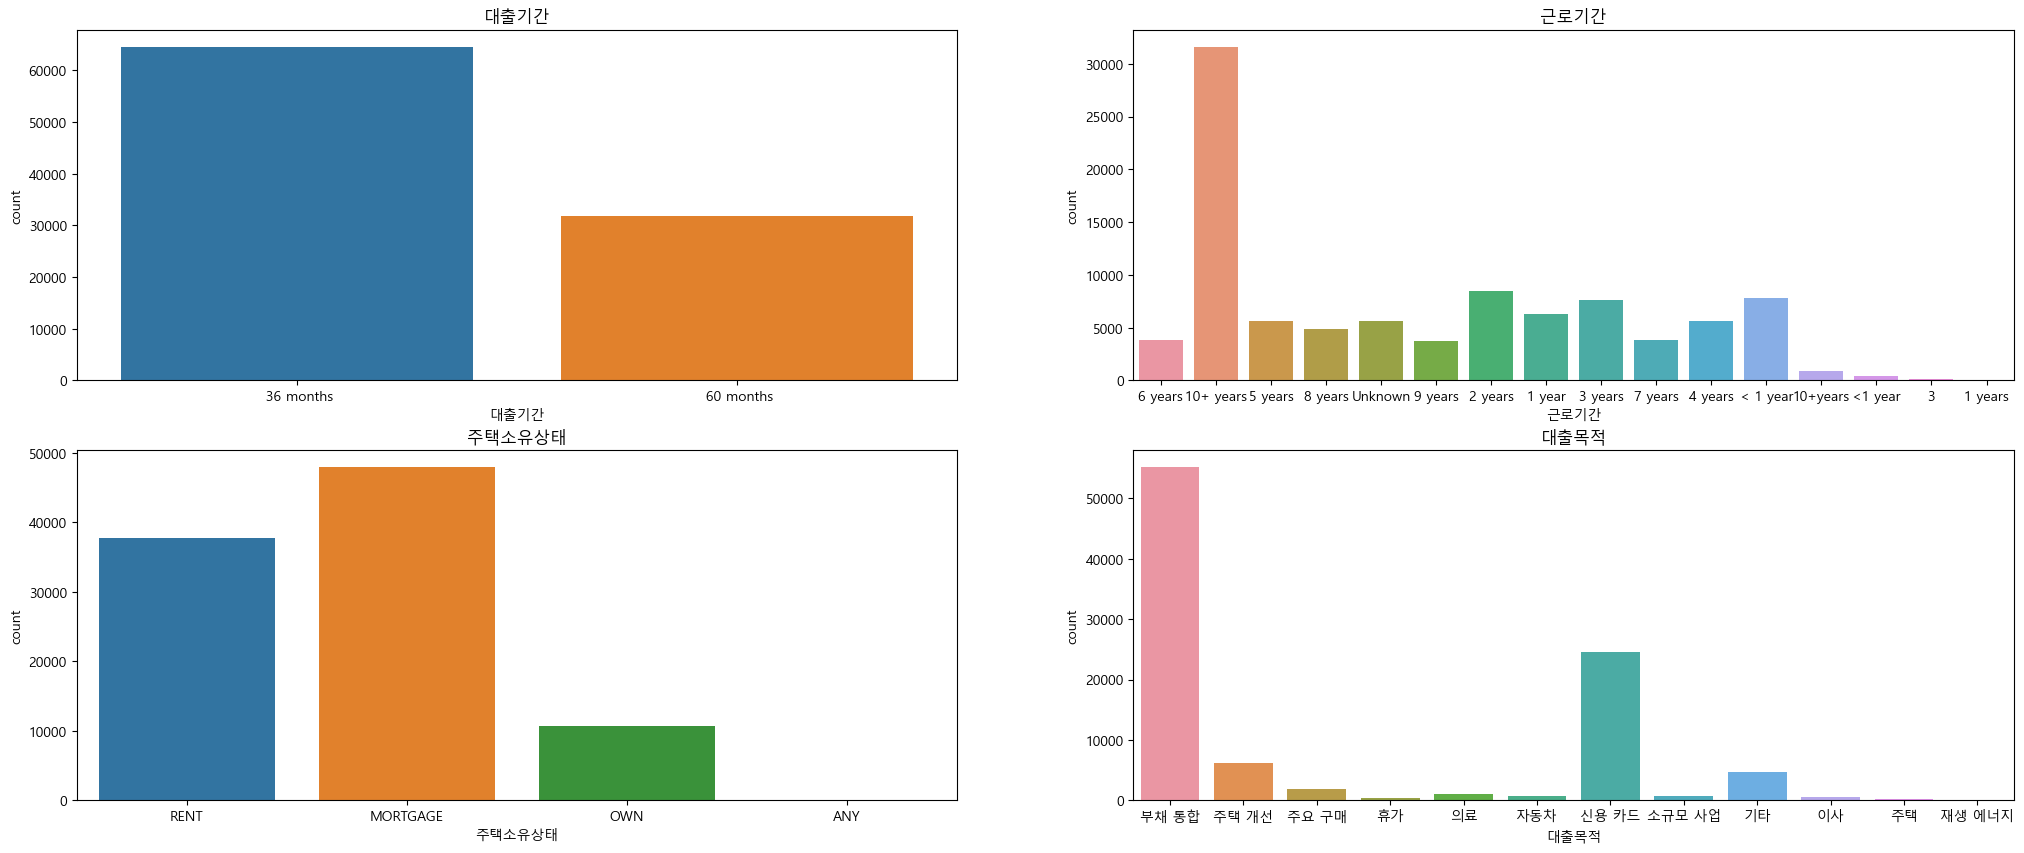

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (25, 10))

sns.countplot(x = train['대출기간'], ax = axes[0][0]).set_title('대출기간')
sns.countplot(x = train['근로기간'], ax = axes[0][1]).set_title('근로기간')
sns.countplot(x = train['주택소유상태'], ax = axes[1][0]).set_title('주택소유상태')
sns.countplot(x = train['대출목적'], ax = axes[1][1]).set_title('대출목적')

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['대출기간', '근로기간', '주택소유상태', '대출목적']

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train[i]) 
    train[i]=le.transform(train[i])
    
    for case in np.unique(test[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case) 
    test[i]=le.transform(test[i])

X = train.drop(columns=['대출등급'])

le_y = LabelEncoder()
y = le_y.fit_transform(train['대출등급'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(77035, 13)
(19259, 13)
(77035,)
(19259,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

rf_clf = RandomForestClassifier()
ext_clf = ExtraTreesClassifier()
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()
cat_clf = CatBoostClassifier()

In [14]:
rf_clf.fit(X_train, y_train)
ext_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
cat_clf.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1461
[LightGBM] [Info] Number of data points in the train set: 77035, number of used features: 13
[LightGBM] [Info] Start training from score -1.741496
[LightGBM] [Info] Start training from score -1.208331
[LightGBM] [Info] Start training from score -1.247371
[LightGBM] [Info] Start training from score -1.982274
[LightGBM] [Info] Start training from score -2.568291
[LightGBM] [Info] Start training from score -3.914427
[LightGBM] [Info] Start training from score -5.423070
Learning rate set to 0.098752
0:	learn: 1.8177311	total: 240ms	remaining: 3m 59s
1:	learn: 1.7155235	total: 307ms	remaining: 2m 33s
2:	learn: 1.6342566	total: 382ms	remaining: 2m 7s
3:	learn: 1.5653409	total: 454ms	remaining: 1m 52s
4:	learn: 1.5143742	total: 517ms	

In [16]:
from sklearn.metrics import accuracy_score

rf = rf_clf.predict(X_val)
ext = ext_clf.predict(X_val)
xgb = xgb_clf.predict(X_val)
lgbm = lgbm_clf.predict(X_val)
cat = cat_clf.predict(X_val)

print('rf 정확도 :', accuracy_score(y_val, rf))
print('ext 정확도 :', accuracy_score(y_val, ext))
print('xgb 정확도 :', accuracy_score(y_val, xgb))
print('lgbm 정확도 :', accuracy_score(y_val, lgbm))
print('cat 정확도 :', accuracy_score(y_val, cat))

rf 정확도 : 0.8024300327119788
ext 정확도 : 0.6802533880263772
xgb 정확도 : 0.8507710680720701
lgbm 정확도 : 0.8401786177890856
cat 정확도 : 0.8291707772989252
